In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score,accuracy_score,classification_report
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV,HalvingGridSearchCV
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [83]:
data = pd.read_csv("https://raw.githubusercontent.com/sazzad15-1779/Datasets/master/Stroke%20prediction/healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [84]:
#bmi have null
#age,bmi have outlier
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
columns=data.columns

In [5]:
for var in columns:
  print(var)
  print(data[var].value_counts())

id
16380    1
58061    1
69918    1
23238    1
4807     1
        ..
35085    1
44375    1
5464     1
50522    1
49152    1
Name: id, Length: 5110, dtype: int64
gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: age, Length: 104, dtype: int64
hypertension
0    4612
1     498
Name: hypertension, dtype: int64
heart_disease
0    4834
1     276
Name: heart_disease, dtype: int64
ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
avg_glucose_level
93.88     6
83.16     5
91.85     5
91.68     5
73.00     5
         ..
162.14    1
111.77    1
90.91     1
103.50    1
88.02 

In [6]:
data.bmi.value_counts

<bound method IndexOpsMixin.value_counts of 0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64>

# handling unknown values of smoking status

In [7]:
data[data['smoking_status']=='smokes']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
11,12095,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
12,12175,Female,54.0,0,0,Yes,Private,Urban,104.51,27.3,smokes,1
16,56112,Male,64.0,0,1,Yes,Private,Urban,191.61,37.5,smokes,1
17,34120,Male,75.0,1,0,Yes,Private,Urban,221.29,25.8,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5082,24552,Female,44.0,0,0,Yes,Private,Rural,72.03,37.5,smokes,0
5084,29540,Male,67.0,0,0,Yes,Private,Rural,97.04,26.9,smokes,0
5090,4211,Male,26.0,0,0,No,Govt_job,Rural,100.85,21.0,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0


In [8]:
data.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [9]:
data.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [10]:
m=[]
for i,x in enumerate(data.smoking_status):
  if data.work_type.iloc[i]=='children' and x=='Unknown':
    m.append('never smoked')
  else:
    m.append(x)
print(m)
len(m)

['formerly smoked', 'never smoked', 'never smoked', 'smokes', 'never smoked', 'formerly smoked', 'never smoked', 'never smoked', 'Unknown', 'Unknown', 'never smoked', 'smokes', 'smokes', 'Unknown', 'never smoked', 'never smoked', 'smokes', 'smokes', 'never smoked', 'Unknown', 'smokes', 'never smoked', 'never smoked', 'Unknown', 'formerly smoked', 'never smoked', 'formerly smoked', 'Unknown', 'smokes', 'formerly smoked', 'smokes', 'Unknown', 'never smoked', 'formerly smoked', 'never smoked', 'formerly smoked', 'formerly smoked', 'formerly smoked', 'Unknown', 'never smoked', 'formerly smoked', 'never smoked', 'smokes', 'formerly smoked', 'smokes', 'never smoked', 'Unknown', 'formerly smoked', 'never smoked', 'smokes', 'Unknown', 'formerly smoked', 'never smoked', 'never smoked', 'never smoked', 'formerly smoked', 'never smoked', 'formerly smoked', 'never smoked', 'never smoked', 'formerly smoked', 'never smoked', 'smokes', 'formerly smoked', 'Unknown', 'never smoked', 'never smoked', 'Un

5110

In [11]:
data['smoking_status1']=m

In [12]:
print(data.smoking_status1.value_counts())
print()
print(data.smoking_status.value_counts())

never smoked       2510
Unknown             926
formerly smoked     885
smokes              789
Name: smoking_status1, dtype: int64

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [13]:
data.smoking_status1[data.age<20].value_counts()

never smoked       805
Unknown            113
formerly smoked     29
smokes              19
Name: smoking_status1, dtype: int64

In [14]:
m=[]
for i,x in enumerate(data.smoking_status1):
  if data.age.iloc[i] < 20 and x=='Unknown':
    m.append('never smoked')
  else:
    m.append(x)
print(m)
len(m)

['formerly smoked', 'never smoked', 'never smoked', 'smokes', 'never smoked', 'formerly smoked', 'never smoked', 'never smoked', 'Unknown', 'Unknown', 'never smoked', 'smokes', 'smokes', 'Unknown', 'never smoked', 'never smoked', 'smokes', 'smokes', 'never smoked', 'Unknown', 'smokes', 'never smoked', 'never smoked', 'Unknown', 'formerly smoked', 'never smoked', 'formerly smoked', 'Unknown', 'smokes', 'formerly smoked', 'smokes', 'Unknown', 'never smoked', 'formerly smoked', 'never smoked', 'formerly smoked', 'formerly smoked', 'formerly smoked', 'Unknown', 'never smoked', 'formerly smoked', 'never smoked', 'smokes', 'formerly smoked', 'smokes', 'never smoked', 'Unknown', 'formerly smoked', 'never smoked', 'smokes', 'Unknown', 'formerly smoked', 'never smoked', 'never smoked', 'never smoked', 'formerly smoked', 'never smoked', 'formerly smoked', 'never smoked', 'never smoked', 'formerly smoked', 'never smoked', 'smokes', 'formerly smoked', 'Unknown', 'never smoked', 'never smoked', 'Un

5110

In [15]:
data['smoking_status1']=m
data.smoking_status1.value_counts()

never smoked       2623
formerly smoked     885
Unknown             813
smokes              789
Name: smoking_status1, dtype: int64

In [16]:
data.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [17]:
data.smoking_status1[data.work_type=='Private'].value_counts()

never smoked       1304
Unknown             547
smokes              543
formerly smoked     531
Name: smoking_status1, dtype: int64

In [18]:
m=[]
for i,x in enumerate(data.smoking_status1):
  if data.work_type.iloc[i] =='Private' and x=='Unknown':
    m.append('smokes')
  else:
    m.append(x)
print(m)
len(m)

['formerly smoked', 'never smoked', 'never smoked', 'smokes', 'never smoked', 'formerly smoked', 'never smoked', 'never smoked', 'smokes', 'smokes', 'never smoked', 'smokes', 'smokes', 'smokes', 'never smoked', 'never smoked', 'smokes', 'smokes', 'never smoked', 'Unknown', 'smokes', 'never smoked', 'never smoked', 'smokes', 'formerly smoked', 'never smoked', 'formerly smoked', 'smokes', 'smokes', 'formerly smoked', 'smokes', 'smokes', 'never smoked', 'formerly smoked', 'never smoked', 'formerly smoked', 'formerly smoked', 'formerly smoked', 'smokes', 'never smoked', 'formerly smoked', 'never smoked', 'smokes', 'formerly smoked', 'smokes', 'never smoked', 'Unknown', 'formerly smoked', 'never smoked', 'smokes', 'smokes', 'formerly smoked', 'never smoked', 'never smoked', 'never smoked', 'formerly smoked', 'never smoked', 'formerly smoked', 'never smoked', 'never smoked', 'formerly smoked', 'never smoked', 'smokes', 'formerly smoked', 'smokes', 'never smoked', 'never smoked', 'smokes', 'f

5110

In [19]:
data['smoking_status1']=m
data.smoking_status1.value_counts()

never smoked       2623
smokes             1336
formerly smoked     885
Unknown             266
Name: smoking_status1, dtype: int64

In [20]:
m=[]
for i,x in enumerate(data.smoking_status1):
  if data.work_type.iloc[i] =='Self-employed' and x=='Unknown':
    m.append('smokes')
  else:
    m.append(x)
print(m)
len(m)

['formerly smoked', 'never smoked', 'never smoked', 'smokes', 'never smoked', 'formerly smoked', 'never smoked', 'never smoked', 'smokes', 'smokes', 'never smoked', 'smokes', 'smokes', 'smokes', 'never smoked', 'never smoked', 'smokes', 'smokes', 'never smoked', 'Unknown', 'smokes', 'never smoked', 'never smoked', 'smokes', 'formerly smoked', 'never smoked', 'formerly smoked', 'smokes', 'smokes', 'formerly smoked', 'smokes', 'smokes', 'never smoked', 'formerly smoked', 'never smoked', 'formerly smoked', 'formerly smoked', 'formerly smoked', 'smokes', 'never smoked', 'formerly smoked', 'never smoked', 'smokes', 'formerly smoked', 'smokes', 'never smoked', 'smokes', 'formerly smoked', 'never smoked', 'smokes', 'smokes', 'formerly smoked', 'never smoked', 'never smoked', 'never smoked', 'formerly smoked', 'never smoked', 'formerly smoked', 'never smoked', 'never smoked', 'formerly smoked', 'never smoked', 'smokes', 'formerly smoked', 'smokes', 'never smoked', 'never smoked', 'smokes', 'fo

5110

In [21]:
data['smoking_status1']=m
data.smoking_status1.value_counts()

never smoked       2623
smokes             1482
formerly smoked     885
Unknown             120
Name: smoking_status1, dtype: int64

In [22]:
m=[]
for i,x in enumerate(data.smoking_status1):
  if data.work_type.iloc[i] =='Govt_job' and x=='Unknown':
    m.append('smokes')
  else:
    m.append(x)
print(m)
len(m)

['formerly smoked', 'never smoked', 'never smoked', 'smokes', 'never smoked', 'formerly smoked', 'never smoked', 'never smoked', 'smokes', 'smokes', 'never smoked', 'smokes', 'smokes', 'smokes', 'never smoked', 'never smoked', 'smokes', 'smokes', 'never smoked', 'smokes', 'smokes', 'never smoked', 'never smoked', 'smokes', 'formerly smoked', 'never smoked', 'formerly smoked', 'smokes', 'smokes', 'formerly smoked', 'smokes', 'smokes', 'never smoked', 'formerly smoked', 'never smoked', 'formerly smoked', 'formerly smoked', 'formerly smoked', 'smokes', 'never smoked', 'formerly smoked', 'never smoked', 'smokes', 'formerly smoked', 'smokes', 'never smoked', 'smokes', 'formerly smoked', 'never smoked', 'smokes', 'smokes', 'formerly smoked', 'never smoked', 'never smoked', 'never smoked', 'formerly smoked', 'never smoked', 'formerly smoked', 'never smoked', 'never smoked', 'formerly smoked', 'never smoked', 'smokes', 'formerly smoked', 'smokes', 'never smoked', 'never smoked', 'smokes', 'for

5110

In [23]:
data['smoking_status1']=m
data.smoking_status1.value_counts()

never smoked       2623
smokes             1602
formerly smoked     885
Name: smoking_status1, dtype: int64

In [24]:
data.drop(columns=['smoking_status'],axis=1,inplace=True)

In [25]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,smoking_status1
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,1,formerly smoked
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,1,never smoked
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,1,never smoked
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,1,smokes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,1,never smoked
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,0,never smoked
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,0,never smoked
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,0,never smoked
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,0,formerly smoked


# handling null values in bmi column

In [26]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
stroke                 0
smoking_status1        0
dtype: int64

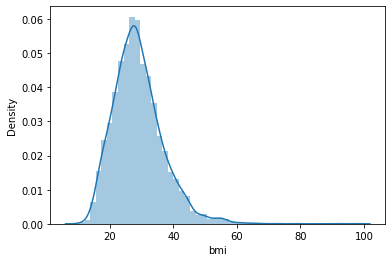

In [27]:
sns.distplot(data.bmi)

In [28]:
data.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [29]:
data.bmi.median()

28.1

In [30]:
data.bmi.fillna(value=data.bmi.median(),inplace=True)

In [31]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
stroke               0
smoking_status1      0
dtype: int64

# handling categorical value

In [32]:
data.select_dtypes(include='O')

,gender,ever_married,work_type,Residence_type,smoking_status1
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [33]:
data=pd.get_dummies(data,columns=['gender','ever_married','Residence_type'],drop_first=True)
data

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke,smoking_status1,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban
0,9046,67.0,0,1,Private,228.69,36.6,1,formerly smoked,1,0,1,1
1,51676,61.0,0,0,Self-employed,202.21,28.1,1,never smoked,0,0,1,0
2,31112,80.0,0,1,Private,105.92,32.5,1,never smoked,1,0,1,0
3,60182,49.0,0,0,Private,171.23,34.4,1,smokes,0,0,1,1
4,1665,79.0,1,0,Self-employed,174.12,24.0,1,never smoked,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,Private,83.75,28.1,0,never smoked,0,0,1,1
5106,44873,81.0,0,0,Self-employed,125.20,40.0,0,never smoked,0,0,1,1
5107,19723,35.0,0,0,Self-employed,82.99,30.6,0,never smoked,0,0,1,0
5108,37544,51.0,0,0,Private,166.29,25.6,0,formerly smoked,1,0,1,0


In [34]:
data.drop(columns=['gender_Other'],inplace=True,axis=1)

In [35]:
data

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke,smoking_status1,gender_Male,ever_married_Yes,Residence_type_Urban
0,9046,67.0,0,1,Private,228.69,36.6,1,formerly smoked,1,1,1
1,51676,61.0,0,0,Self-employed,202.21,28.1,1,never smoked,0,1,0
2,31112,80.0,0,1,Private,105.92,32.5,1,never smoked,1,1,0
3,60182,49.0,0,0,Private,171.23,34.4,1,smokes,0,1,1
4,1665,79.0,1,0,Self-employed,174.12,24.0,1,never smoked,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,Private,83.75,28.1,0,never smoked,0,1,1
5106,44873,81.0,0,0,Self-employed,125.20,40.0,0,never smoked,0,1,1
5107,19723,35.0,0,0,Self-employed,82.99,30.6,0,never smoked,0,1,0
5108,37544,51.0,0,0,Private,166.29,25.6,0,formerly smoked,1,1,0


In [36]:
from sklearn.preprocessing import LabelEncoder
lben= LabelEncoder()
data['work_type']=lben.fit_transform(data['work_type'])
data['smoking_status']=lben.fit_transform(data['smoking_status1'])

In [37]:
data.drop(columns=['smoking_status1'],inplace=True,axis=1)

In [38]:
data[data.id==69768]

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,Residence_type_Urban,smoking_status
162,69768,1.32,0,0,4,70.37,28.1,1,0,0,1,1


In [39]:
data.drop(columns=['id'],inplace=True,axis=1)

In [40]:
data

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,Residence_type_Urban,smoking_status
0,67.0,0,1,2,228.69,36.6,1,1,1,1,0
1,61.0,0,0,3,202.21,28.1,1,0,1,0,1
2,80.0,0,1,2,105.92,32.5,1,1,1,0,1
3,49.0,0,0,2,171.23,34.4,1,0,1,1,2
4,79.0,1,0,3,174.12,24.0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,2,83.75,28.1,0,0,1,1,1
5106,81.0,0,0,3,125.20,40.0,0,0,1,1,1
5107,35.0,0,0,3,82.99,30.6,0,0,1,0,1
5108,51.0,0,0,2,166.29,25.6,0,1,1,0,0


# build model 


In [41]:
x= data.drop(columns=['stroke'])
y=data.stroke

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=23, stratify=y)

In [61]:
X_train.shape,X_test.shape

((3406, 10), (1704, 10))

In [62]:
X_train

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,gender_Male,ever_married_Yes,Residence_type_Urban,smoking_status
1789,13.0,0,0,1,70.93,22.9,0,0,1,1
3685,2.0,0,0,4,82.30,18.8,0,0,1,1
1196,33.0,0,0,2,79.91,33.5,0,1,1,1
1804,48.0,1,0,2,110.53,34.2,1,0,1,1
4434,63.0,1,0,0,192.50,29.0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
1401,55.0,0,0,2,87.72,27.0,1,1,1,2
360,76.0,1,0,3,209.58,28.1,0,1,1,1
1669,58.0,0,0,2,94.00,28.1,1,1,1,2
1786,75.0,0,0,3,87.69,27.5,0,1,1,0


# numerical value standerdization

In [63]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler,StandardScaler

In [64]:
scaler = StandardScaler().fit(X_train)
X_train_std_scl = scaler.transform(X_train)
X_test_std_scl = scaler.transform(X_test)

In [65]:
X_train_std_scl.shape,X_test_std_scl.shape,y_train.shape,y_test.shape

((3406, 10), (1704, 10), (3406,), (1704,))

#creating model

In [66]:
classifiers = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Support Vector Machines' : SVC(),
    'K-nearest Neighbors' : KNeighborsClassifier(),
    'XGBoost' : XGBClassifier(),
    'LGBBoost':LGBMClassifier()

}

In [67]:
results=pd.DataFrame(columns=['Accuracy in %','F1-score'])
for method,func in classifiers.items():
    func.fit(X_train_std_scl,y_train)
    pred = func.predict(X_test_std_scl)
    results.loc[method]= [100*np.round(accuracy_score(y_test,pred),decimals=4),
                         round(f1_score(y_test,pred),2)]
results

,Accuracy in %,F1-score
Logistic Regression,95.13,0.00
Decision Tree,91.37,0.18
Random Forest,95.07,0.02
Support Vector Machines,95.13,0.00
K-nearest Neighbors,94.89,0.00
XGBoost,95.01,0.00
LGBBoost,94.37,0.08


#hypertuning

#### lgboosting hypertune

In [68]:
lgb = LGBMClassifier()
#Define the parameters
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[5,8,12,10],
             'learning_rate':[0.05,0.1, 0.01, 0.02],'reg_alpha':[0,0.01,0.03], 'num_iterations': [100,200,300,500]}
reg = HalvingGridSearchCV(lgb,parameters,scoring="roc_auc",cv=3,n_jobs=1,factor=3)
reg.fit(X_train_std_scl, y_train)

HalvingGridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=1,
                    param_grid={'learning_rate': [0.05, 0.1, 0.01, 0.02],
                                'max_depth': [5, 8, 12, 10],
                                'min_child_samples': [5, 10, 15],
                                'num_iterations': [100, 200, 300, 500],
                                'num_leaves': [20, 40, 60, 80, 100],
                                'reg_alpha': [0, 0.01, 0.03]},
                    scoring='roc_auc')

In [71]:
print(reg.best_params_)
print(reg.best_score_)
reg.score(X_test_std_scl,y_test)

{'learning_rate': 0.05, 'max_depth': 5, 'min_child_samples': 5, 'num_iterations': 200, 'num_leaves': 40, 'reg_alpha': 0.01}
0.7907739741881304


0.8357328140445806

#### xgboosting hypertune

In [72]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate":[0.1,.02,.01,.07],
    " n_estimators":[100,200,300,400,1000],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],  # Fix subsample
    "colsample_bytree": [0.5],  # Fix colsample_bytree
}
xgb_cl=XGBClassifier()
xgb_halv = HalvingGridSearchCV(
    xgb_cl, param_grid, scoring="roc_auc", n_jobs=1, min_resources="exhaust", factor=3
)
xgb_halv_h= xgb_halv.fit(X_train_std_scl, y_train)


In [73]:
print(xgb_halv_h.best_params_)
print(xgb_halv_h.best_score_)
xgb_halv_h.score(X_test_std_scl,y_test)

{' n_estimators': 200, 'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.07, 'max_depth': 4, 'reg_lambda': 10, 'scale_pos_weight': 5, 'subsample': 0.8}
0.8310265957220008


0.8516756724615923

#### randomforest hypertune

In [78]:
random_grid = {'n_estimators':  [100,200,300],
               'max_features': ['auto', 'sqrt','log2'],
               'max_depth': [10,100,700],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1,2, 5]}
             
rf_cl=RandomForestClassifier()
rand_halv = HalvingGridSearchCV(
    rf_cl, random_grid, scoring="roc_auc", n_jobs=-1,factor=3
)
rand_halv_h= rand_halv.fit(X_train_std_scl, y_train)

In [79]:
print(rand_halv_h.best_params_)
print(rand_halv_h.best_estimator_)
print(rand_halv_h.best_score_)

{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}
RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=5,
                       min_samples_split=10, n_estimators=200)
0.820317549529296


In [80]:
rand_halv_h.score(X_test_std_scl,y_test)

0.8542770712708948

# ann model apply

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
X_train, X_val, y_train, y_val = train_test_split(X_train_std_scl,y_train,test_size=0.20)

In [ ]:


model = Sequential()
model.add(Dense(12,activation='relu'))
model.add(Dense(50,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics = ["accuracy"])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

model.fit(x=X_train,y=y_train,
          validation_data=(X_val,y_val.values),
          batch_size=100,epochs=150,callbacks=[early_stop])

Epoch 1/150
28/28 [==============================] - 1s 11ms/step - loss: 0.6009 - accuracy: 0.8293 - val_loss: 0.4481 - val_accuracy: 0.9428
Epoch 2/150
28/28 [==============================] - 0s 4ms/step - loss: 0.3008 - accuracy: 0.9534 - val_loss: 0.2684 - val_accuracy: 0.9428
Epoch 3/150
28/28 [==============================] - 0s 3ms/step - loss: 0.2148 - accuracy: 0.9534 - val_loss: 0.2383 - val_accuracy: 0.9428
Epoch 4/150
28/28 [==============================] - 0s 4ms/step - loss: 0.2033 - accuracy: 0.9534 - val_loss: 0.2273 - val_accuracy: 0.9428
Epoch 5/150
28/28 [==============================] - 0s 4ms/step - loss: 0.1977 - accuracy: 0.9534 - val_loss: 0.2231 - val_accuracy: 0.9428
Epoch 6/150
28/28 [==============================] - 0s 3ms/step - loss: 0.1906 - accuracy: 0.9534 - val_loss: 0.2154 - val_accuracy: 0.9428
Epoch 7/150
28/28 [==============================] - 0s 4ms/step - loss: 0.1853 - accuracy: 0.9534 - val_loss: 0.2118 - val_accuracy: 0.9428
Epoch 8/150


In [ ]:
#Accuracy of test dataset
model.evaluate(X_test_std_scl,y_test)

54/54 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9513


[0.15974290668964386, 0.9512910842895508]

# creating pickle file

In [ ]:
import pickle 
pickle.dump(rn,open('stroke disease prediction.pkl','wb'))